# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

In [3]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 43 (delta 9), reused 5 (delta 5), pack-reused 27 (from 1)
Receiving objects: 100% (43/43), 3.60 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

# 1

A model is linear if it's linear in the coefficients. That means the model adds up terms like βx, without multiplying coefficients together or applying functions to them. The input variables can be transformed (like x^2 or log(x)), but as long as the coefficients stay linear, the model is still considered linear.

# 2

It shows how the outcome changes when that category is present, compared to the reference group. This only works if the model includes an intercept. The intercept gives the average for the baseline group, and the dummy’s coefficient shows how much higher or lower the category’s average is.

# 3

Yes, but it’s not ideal. Linear regression can try to predict 0 or 1 for binary outcomes, but the predictions can go outside that range, which doesn’t make sense. It also assumes equal variance, which doesn’t fit binary data well. Logistic regression is better for classification.

# 4

If your model performs really well on training data but poorly on new data, it might be overfitting. Other signs include very high R^2 in training, large swings in coefficients, and too many variables in the model—especially ones that don’t really help.

# 5

Multicollinearity happens when predictors are too similar to each other. This makes it hard to tell which one matters and leads to unstable results. Two-stage least squares fixes this by first predicting the problematic variable using others (called instruments), then using that prediction in the final model to get cleaner results.

# 6

You can transform your variables. Add squares (x^2), logs (log(x)), or use interaction terms (𝑥1 × 𝑥2) to capture curves and more complex patterns. These keep the model linear in the coefficients while letting you model nonlinear effects.

# 7

Intercept: The predicted value of y when all predictors are zero.

Slope: How much y changes when a predictor increases by one unit.

Dummy: The difference in y between that group and the reference group.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [4]:
# 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("/content/linearModels/assignment/data/Q1_clean.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

avg_stats = df.groupby("Neighbourhood")[["Price", "Review_Scores_Rating"]].mean().reset_index()

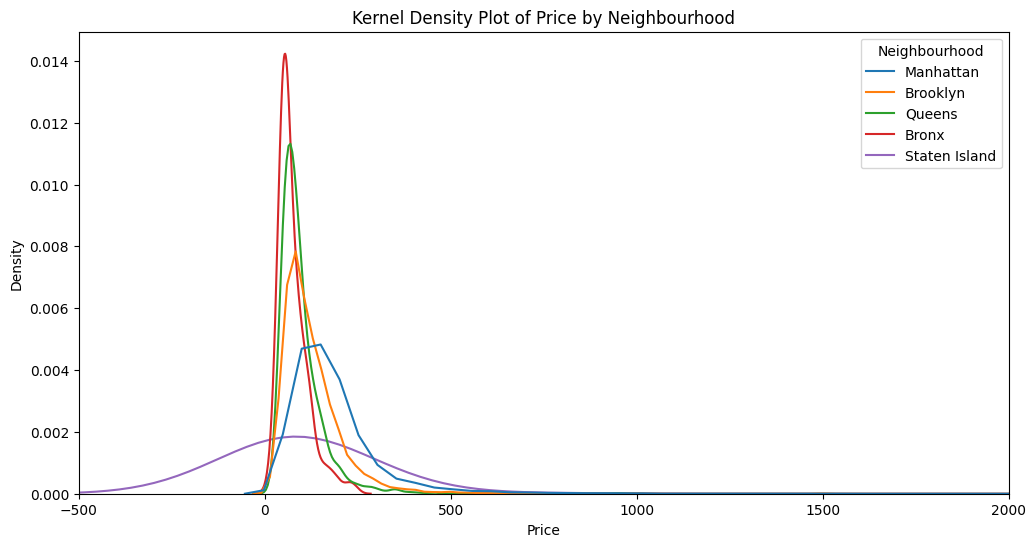

In [5]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="Price", hue="Neighbourhood", common_norm=False)
plt.title("Kernel Density Plot of Price by Neighbourhood")
plt.xlabel("Price")
plt.ylabel("Density")
plt.xlim(-500, 2000)
plt.show()

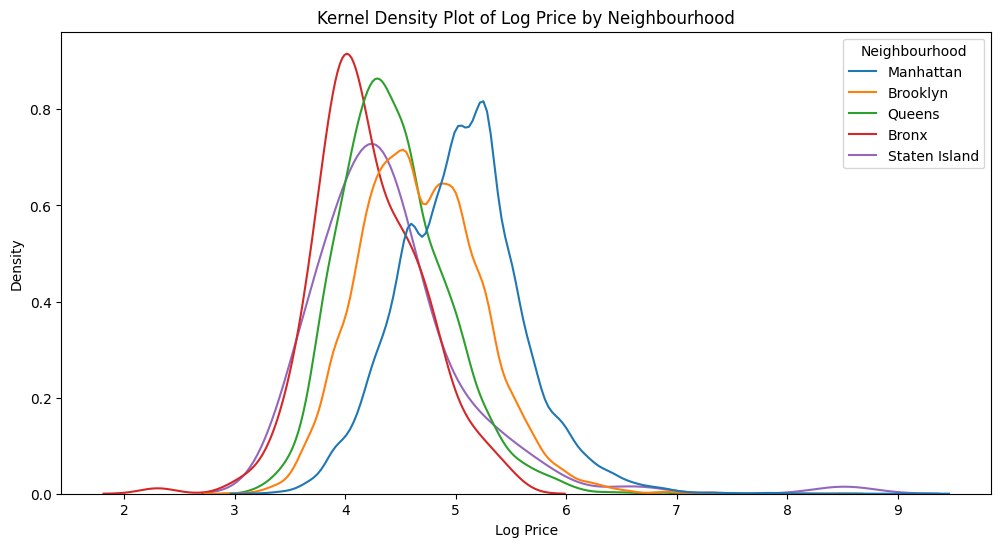

The most expesive Neighbourhood is: Manhattan
The most expesive average price is: 183.6642863215166


In [6]:
df["Log_Price"] = df["Price"].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Kernel density plot of Log Price
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="Log_Price", hue="Neighbourhood", common_norm=False)
plt.title("Kernel Density Plot of Log Price by Neighbourhood")
plt.xlabel("Log Price")
plt.ylabel("Density")
plt.show()

most_expensive = avg_stats.loc[avg_stats["Price"].idxmax()]
print("The most expesive Neighbourhood is:", most_expensive["Neighbourhood"])
print("The most expesive average price is:", most_expensive["Price"])

In [20]:
# 2

# Create the design matrix: all neighbourhood dummies, no intercept
X = pd.get_dummies(df['Neighbourhood'], drop_first=False)
y = df["Price"]

# Fit the linear regression model without an intercept
model = sm.OLS(y, X).fit()

# Get the coefficients
coefficients = model.params
print(coefficients)

Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64


When we compare the regression coefficients to the average prices by Neighbourhood, they are exactly the same. Each coefficient equals the group’s average price. This shows that when you regress a continuous variable on a categorical variable without an intercept, the coefficients represent the group means. If you include an intercept, the coefficients instead represent differences from a baseline group.

In [22]:
# 3

# Build design matrix with intercept
X = pd.get_dummies(df['Neighbourhood'], drop_first=True)
X = sm.add_constant(X)
X = X.astype(float)
y = df['Price']

model = sm.OLS(y, X).fit()

coefficients_with_intercept = model.params
print(coefficients_with_intercept)

const             75.276498
Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64


When you include an intercept, you drop one dummy to serve as the reference group—in our case, the Bronx. The intercept (about 75.28) the Bronx’s average price. Each other coefficient shows how much more that borough’s price is compared to the Bronx: Brooklyn +52.47, Manhattan +108.39, Queens +21.58, and Staten Island +70.89. If you add the intercept back to each coefficient, you recover the raw group means

In [44]:
# 4

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_enc = pd.get_dummies(df, columns=['Neighbourhood', 'Property_Type'], drop_first=True)

X1 = df_enc[['Review_Scores_Rating'] + [c for c in df_enc.columns if c.startswith('Neighbourhood_')]]
y1 = df_enc['Price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=102402)
model1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
r2_1 = r2_score(y1_test, y1_pred)
rmse_1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
coef1 = model1.coef_[X1.columns.get_loc('Review_Scores_Rating')]

# Find the most expensive property type (by average Price)
avg_by_prop = df.groupby('Property_Type')['Price'].mean().sort_values(ascending=False)
most_expensive_prop = avg_by_prop.index[0]

print("Model 1 (Review_Scores_Rating + Neighbourhood):")
print(f"Test R²: {r2_1:.4f}")
print(f"Test RMSE: ${rmse_1:.2f}")
print(f"Review_Scores_Rating slope: {coef1:.2f}")
print(f"Most expensive property type:{most_expensive_prop} "
      f"(avg ${avg_by_prop.iloc[0]:.2f})")

Model 1 (Review_Scores_Rating + Neighbourhood):
Test R²: 0.0585
Test RMSE: $127.91
Review_Scores_Rating slope: 0.99
Most expensive property type:Condominium (avg $241.23)


In [45]:
# 5

X2 = df_enc[['Review_Scores_Rating'] +
            [c for c in df_enc.columns if c.startswith('Neighbourhood_') or c.startswith('Property_Type_')]]
y2 = df_enc['Price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=102402)
model2 = LinearRegression().fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
r2_2 = r2_score(y2_test, y2_pred)
rmse_2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
coef2 = model2.coef_[X2.columns.get_loc('Review_Scores_Rating')]

# Identify most expensive property type
avg_prop = df.groupby('Property_Type')['Price'].mean().reset_index()
avg_prop_sorted = avg_prop.sort_values('Price', ascending=False)
most_expensive = avg_prop_sorted.iloc[0]

print("Model 2 (+ Property_Type):")
print(f"Test R²: {r2_2:.4f}")
print(f"Test RMSE: ${rmse_2:.2f}")
print(f"Review_Scores_Rating slope: {coef2:.2f}")
print(f"Most expensive property type: {most_expensive.Property_Type} "
      f"(avg ${most_expensive.Price:.2f})")

Model 2 (+ Property_Type):
Test R²: 0.0645
Test RMSE: $127.51
Review_Scores_Rating slope: 0.99
Most expensive property type: Condominium (avg $241.23)


# 6

The shift in the Review Scores Rating coefficient simply shows that in a multiple regression you’re estimating its partial effect—what happens to price for a one-point jump in review score after holding all other variables constant. Once you add property-type dummies, whatever price variation was actually due to property type gets pulled out, so the rating coefficient adjusts to show only the rating’s unique impact.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [48]:
df = pd.read_csv("/content/linearModels/assignment/data/heart_hw.csv")

# 1

prop_control = df[df['transplant'] == 'control']['y'].mean()
prop_treatment = df[df['transplant'] == 'treatment']['y'].mean()
ate = prop_treatment - prop_control

print("Control Survival Rate:", round(prop_control, 3))
print("Transplant Survival Rate:", round(prop_treatment, 3))
print("Average Treatment Effect:", round(ate, 3))

Control Survival Rate: 0.118
Transplant Survival Rate: 0.348
Average Treatment Effect: 0.23


In [50]:
# 2

import statsmodels.formula.api as smf

model = smf.ols('y ~ C(transplant)', data=df).fit()
print(model.params)

Intercept                     0.117647
C(transplant)[T.treatment]    0.230179
dtype: float64


The constant is the Control Survival Rate and the coefficient on transplant is the Average Treatment Effect. This relationship makes sense because in a simple linear regression with one dummy, the intercept equals the mean of the 0-group, and the dummy’s coefficient equals the difference in group means.

In [51]:
# 3

model = smf.ols('y ~ C(transplant) + age', data=df).fit()
coeffs = model.params.to_frame(name='Coefficient')

print(coeffs)

                            Coefficient
Intercept                      0.701957
C(transplant)[T.treatment]     0.264702
age                           -0.013607


After adding age to the model, the intercept jumps from about 0.12 up to roughly 0.70. This is because in the original model, the intercept was the mean survival probability for the control group (about 11.8%). Once age is included, the intercept becomes the predicted survival probability when transplant = control and age = 0. Since age = 0 is far below the actual ages in the data, the intercept shifts upward to place the regression line appropriately for the observed age range.

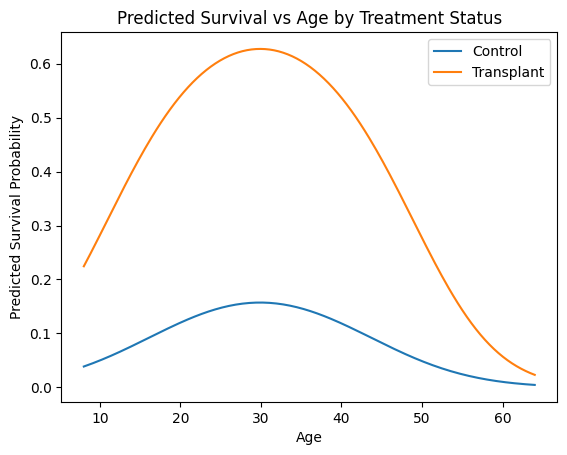

In [54]:
# 4

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, brier_score_loss

df['treat'] = (df['transplant'] == 'treatment').astype(int)
# Non-linear age features and interactions
df['age2'] = df['age'] ** 2
df['treat_age'] = df['treat'] * df['age']
df['treat_age2'] = df['treat'] * df['age2']

# Features and target
features = ['treat', 'age', 'age2', 'treat_age', 'treat_age2']
X = df[features]
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=102402
)

# Fit logistic regression
model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Validate
y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
brier = brier_score_loss(y_test, y_proba)

# Prepare metrics DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['ROC AUC', 'Brier Score'],
    'Value': [auc, brier]
})

# Predict probabilities by age for control and treatment
age_grid = np.linspace(df['age'].min(), df['age'].max(), 200)
# Control scenario
X0 = pd.DataFrame({
    'treat': 0,
    'age': age_grid,
    'age2': age_grid**2,
    'treat_age': 0,
    'treat_age2': 0
})
# Treatment scenario
X1 = pd.DataFrame({
    'treat': 1,
    'age': age_grid,
    'age2': age_grid**2,
    'treat_age': age_grid,
    'treat_age2': age_grid**2
})

p0 = model.predict_proba(X0)[:, 1]
p1 = model.predict_proba(X1)[:, 1]

# Plot
plt.figure()
plt.plot(age_grid, p0)
plt.plot(age_grid, p1)
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival vs Age by Treatment Status')
plt.legend(['Control', 'Transplant'])
plt.show()

When predicted survival probability against age is plotted, we can see a clear hump for both groups—survival probability rises from young ages to a peak in the mid-20s and then declines at older ages. However, the transplant group curve sits consistently above the control curve, indicating that at every age, transplant recipients have a higher predicted chance of survival, yet the relative benefit remains fairly stable across ages.

# 5

 In model building, you’ll likely inherit biases from non-random historical data (e.g. geography, insurance status), use a simplified outcome (3-year survival) instead of full time-to-event analysis, and risk overfitting with many interaction or polynomial terms. Including sensitive features like race or ZIP code can cement existing health disparities unless you carefully audit for fairness.

In deployment, black-box scores undermine transparency and patient trust, while rigid thresholds can inject hidden value judgments about who “deserves” an organ. Worse, once you allocate based on the model, you change future data in ways that can amplify bias. Oversight, explainable rules, continual monitoring for disparities, and clear accountability are essential if any algorithm is used in life-or-death decisions.

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
